# CSI 5139

## Ahmed Haj Abdel Khaleq 

## 8223727

# 1.1 Getting Started

Joining the images into pairs:

In [675]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from skimage import io, transform, feature


# hardcoding paths for easy access
training_path = "training/"
testing_path = "testing/"

# retrieving the directory of each path 
training_dir = os.listdir(training_path)
testing_dir = os.listdir(testing_path)


# sort the directories for easy reference-checking
training_dir.sort()
testing_dir.sort()


# creating arrays to house the numpy arrays of each set of samples
training_pairs = []
testing_pairs = []

already_paired_train = [] 
already_paired_test = []

# creating arrays to house the labels of each set of samples
y_train = []
y_test = []

# populate each array with a numpy array representation of each image
for i in training_dir:
    for j in training_dir:
        
        # check if j has already been paired, if yes do not add it
        if(j in already_paired_train):
            continue
            
        material1 = i.split('.')
        material2 = j.split('.')
        
        # label == 0 means they are a pair, label == 1 means they are not
        if(material1[0] == material2[0] and material1[1] == material2[1]):
            
            # do not add pairs of the same image or a pair that we have already added
            if(material1[2] == material2[2]):
                continue
                
            label = 0
        else:
            label = 1
        
        training_pairs.append((training_path + i,training_path + j, label))
        y_train.append(label)
   
    # add image to array, indicating it has been paired with all other images (prevents duplicates)     
    already_paired_train.append(i)
    
for i in testing_dir:
    for j in testing_dir:
        
        # check if j has already been paired, if yes do not add it
        if(j in already_paired_test):
            continue
            
        material1 = i.split('.')
        material2 = j.split('.')
        
        # label == 0 means they are a pair, label == 1 means they are not
        if(material1[0] == material2[0] and material1[1] == material2[1]):
            
            # do not add pairs of the same image or a pair that we have already added
            if(material1[2] == material2[2]):
                continue
                
            label = 0
        else:
            label = 1
        
        testing_pairs.append((testing_path + i,testing_path + j, label))
        y_test.append(label)
   
    # add image to array, indicating it has been paired with all other images (prevents duplicates)     
    already_paired_test.append(i)
      
y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)    

print("Training dataset contains: {0} pairs with {1} similar pairs and {2} different pairs\n".format(len(training_pairs), len(np.where(y_train == 0)[0]), len(np.where(y_train==1)[0])))
print("Testing dataset contains: {0} pairs with {1} similar pairs and {2} different pairs\n".format(len(testing_pairs), len(np.where(y_test == 0)[0]), len(np.where(y_test==1)[0])))

Training dataset contains: 56280 pairs with 2520 similar pairs and 53760 different pairs

Testing dataset contains: 6216 pairs with 840 similar pairs and 5376 different pairs



# 1.2 Template Matching

NCC Reference: https://dsp.stackexchange.com/questions/28322/python-normalized-cross-correlation-to-measure-similarites-in-2-images



Similar Materal results:
NCC:0.04040735741041622      SSD:348633      Convolution:2056436

NCC:0.004595383907089078      SSD:396795      Convolution:2050882

Different Material results:
NCC:-0.007058948178050462      SSD:446645      Convolution:2054778

NCC:-0.018652068620042362      SSD:398846      Convolution:2048824


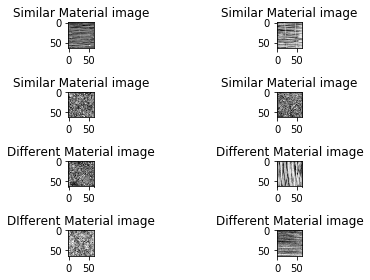

In [676]:
from scipy import signal

# Calculate NCC {slide 83} tested for performance against skimage template matching (equivalent performance) because I wanted to understand how it operates
def NCC(image1, image2):
    prod = np.sum((image1 - np.mean(image1)) * (image2 - np.mean(image2)))
    
    prod2 = np.sum(np.square(image1 - np.mean(image1)))
    prod3 = np.sum(np.square(image2 - np.mean(image2)))
    scalingfactor = np.sqrt(prod2 * prod3)
    
    if(scalingfactor == 0):
        return 0
    
    return prod/scalingfactor

# Calculate SSD {slide 80}
def SSD(image1, image2):
    result = np.sum(np.square(image1 - image2))
    
    return result

# Convolution is cross-correlation but with the filter (i.e, image 1, flipped)
def Convolution(image1, image2):
    result = np.sum(signal.convolve2d(image1,image2))
    
    return result

# Function that reads in image paths stored in training_pairs and testing_pairs
def readImgs(input_pairs, index):
    image1 = io.imread(input_pairs[index][0])
    image2 = io.imread(input_pairs[index][1])
    
    return (image1, image2)



# select the random samples from training set to showcase the 3 methods
indexSame = np.where(y_train == 0)[0]
indexDif  = np.where(y_train == 1)[0]

r1 = 0
r2 = 0
r3 = 0
r4 = 0



while(r1== r2 and r3==r4):
    r1 = indexSame[np.random.choice(indexSame.shape[0])] 
    r2 = indexSame[np.random.choice(indexSame.shape[0])] 
    r3 = indexDif[np.random.choice(indexDif.shape[0])] 
    r4 = indexDif[np.random.choice(indexDif.shape[0])] 
    

# retrieve similar material images
similarImg1, similarImg2 = readImgs(training_pairs, r1)
similarImg3, similarImg4 = readImgs(training_pairs, r2)

# retrieve different material iamges
difImg1, difImg2 = readImgs(training_pairs, r3)
difImg3, difImg4 = readImgs(training_pairs, r4)


# plot
figure, axes = plt.subplots(nrows=4, ncols=2)
ax = axes.ravel()

ax[0].imshow(similarImg1, cmap='gray')
ax[0].set_title("Similar Material image")

ax[1].imshow(similarImg2 , cmap='gray')
ax[1].set_title("Similar Material image")

ax[2].imshow(similarImg3, cmap='gray')
ax[2].set_title("Similar Material image")

ax[3].imshow(similarImg4 , cmap='gray')
ax[3].set_title("Similar Material image")

ax[4].imshow(difImg1, cmap='gray')
ax[4].set_title("Different Material image")

ax[5].imshow(difImg2 , cmap='gray')
ax[5].set_title("Different Material image")

ax[6].imshow(difImg3, cmap='gray')
ax[6].set_title("DIfferent Material image")

ax[7].imshow(difImg4 , cmap='gray')
ax[7].set_title("Different Material image")


figure.tight_layout()

print("Similar Materal results:")
print('NCC:{0}      SSD:{1}      Convolution:{2}\n'.format(NCC(similarImg1, similarImg2), SSD(similarImg1, similarImg2), Convolution(similarImg1, similarImg2)))
print('NCC:{0}      SSD:{1}      Convolution:{2}\n'.format(NCC(similarImg3, similarImg4), SSD(similarImg3, similarImg4), Convolution(similarImg3, similarImg4)))

print("Different Material results:")
print('NCC:{0}      SSD:{1}      Convolution:{2}\n'.format(NCC(difImg1, difImg2), SSD(difImg1, difImg2), Convolution(difImg1, difImg2)))
print('NCC:{0}      SSD:{1}      Convolution:{2}'.format(NCC(difImg3, difImg4), SSD(difImg3, difImg4), Convolution(difImg3, difImg4)))



In [679]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Simple Classifier using SSD
def SSD_Classifier(image1, image2, threshold):
    
    
    score = SSD(image1, image2)
    
    if(abs(score) < threshold):
        label = 0
    else:
        label = 1
    
    return label

# function that predicts using our SSD Classifier using a 400000 threshold
def pred(input_data):
    y_pred = []
    for i in input_data:
        image1 = io.imread(i[0])
        image2 = io.imread(i[1])
        
        output = SSD_Classifier(image1, image2, 400000)
        
        y_pred.append(output)
    
    y_pred = np.asarray(y_pred)
    
    return y_pred

# same as pred, but uses an input of images as opposed to paths
def pred_optimized(input_data):
    y_pred = []
    for i in input_data:
        output = SSD_Classifier(i[0], i[1], 400000)
        
        y_pred.append(output)
    
    y_pred = np.asarray(y_pred)
    
    return y_pred
        
    
# test against testing set
y_pred = pred(testing_pairs)

# print results (taken from MNIST notebook)
def print_classifier_scores( y_true, y_res ) :
    print('Precision is {0} '.format(precision_score(y_true, y_res, pos_label = 0)))
    print('Recall is {0} '.format(recall_score(y_true, y_res, pos_label = 0)))
    print('F1 is {0} '.format(f1_score(y_true, y_res)))
    print( 'And the confusion matrix: \n {0}'.format(confusion_matrix(y_true, y_res) ))

print('SSD Classifier scores on test set: ')
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred)))
print_classifier_scores(y_test,y_pred)



SSD Classifier scores on test set: 
Classifier accuracy on the test set is 0.6270913770913771 
Precision is 0.23455459770114942 
Recall is 0.7773809523809524 
F1 is 0.7368301544050863 
And the confusion matrix: 
 [[ 653  187]
 [2131 3245]]


## Discussion 


### Method Comparison
When comparing the 3 methods, I chose sum of squared differences as the method to be used in my classifier. 

When using Normalized Cross Correlation, the closer the NCC value is to 0, the less correlation there is between the 2 images. However, the closer the value is to 1 or -1, then the two images are either the same, or inverted versions of the same image. Therefore, the further away the value is from 0, the more likely that the 2 images are correlated. This is because even if the images are inverted, then they are likely to be correlated because when inverting a pattern, the pattern is simply transformed, not removed. However, after doing some testing, NCC produces values that are more often than not close to 0, giving it a bad accuracy in this context.  This is possibly because we are not looking for exact matches for the images, but simply images that seem to be of the same material as each other.

Convolution suffers from the same issue, which I suspect is because we are not looking for exact matches. 

When using sum of squared differences, the closer the SSD value is to 0, the more correlation there is between the images, with 0 indicating that the images are the same. 

As seen above, when the images are of the same material, the SSD value tends to be below 400,000 and vice versa. Therefore, SSD seems to be able to differentiate between images that are of the same material, and those that are not. Which I believe makes sense because squaring the difference blurs out the exact difference between the images, making SSD more forgiving when finding similarities between 2 images as opposed to exact matches.

### Classifier Result 

Discussed in 1.4.

# 1.3 Perceptron 

As recommended by the Professor, I will be adding images in both orders A-B and B-A to the training set of the perceptron, while keeping the test set the same in order to compare it with the SSD classifier.

The parameters of the MLP were found after experimenting with different values.

In [659]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# concatenating pairs so that the MLP takes in images as pairs
conc_training = []
conc_testing = []

# new label arrays, since we are training the MLP on all 112560 pairs with duplicates
y_train = []
y_test = []

print("Concatenating...")
for pair in training_pairs:
    image1 = io.imread(pair[0])
    image2 = io.imread(pair[1])
    
    
    
    # concatenate into a 128x64 dimension photo
    concat_pair = np.concatenate((image1, image2), axis=1)
    conc_training.append(concat_pair)
    y_train.append(pair[2])
    
    # concatenate reverse order into a 128x64 dimension photo
    concat_pair = np.concatenate((image2, image1), axis=1)
    conc_training.append(concat_pair)
    y_train.append(pair[2])
    
    
    
for pair in testing_pairs:
    image1 = io.imread(pair[0])
    image2 = io.imread(pair[1])
    
    # concatenate into a 128x64 dimension photo
    concat_pair = np.concatenate((image1, image2), axis=1)
    conc_testing.append(concat_pair)
    y_test.append(pair[2])
    
    
    

conc_training = np.asarray(conc_training)
conc_testing = np.asarray(conc_testing)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print("Done")

Concatenating...
Done


In [660]:

X_train = np.asarray(conc_training)
X_test = np.asarray(conc_testing)

# Reshaping the training and testing sample into 2d shapes to be able to work on our model
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples, -1))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples, -1))


# creating and training our MLP model
nn_clf = MLPClassifier(max_iter=100, solver='adam',verbose='true', learning_rate = 'adaptive', hidden_layer_sizes = (100,100,50))
nn_clf.fit(X_train, y_train)

Iteration 1, loss = 2.28020139
Iteration 2, loss = 0.19695022
Iteration 3, loss = 0.18690512
Iteration 4, loss = 0.16918828
Iteration 5, loss = 0.22300907
Iteration 6, loss = 0.16530918
Iteration 7, loss = 0.21381516
Iteration 8, loss = 0.17762337
Iteration 9, loss = 0.17990554
Iteration 10, loss = 0.17342661
Iteration 11, loss = 0.18474402
Iteration 12, loss = 0.18954544
Iteration 13, loss = 0.19052858
Iteration 14, loss = 0.18861924
Iteration 15, loss = 0.18874602
Iteration 16, loss = 0.18744487
Iteration 17, loss = 0.18607780
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(100, 100, 50), learning_rate='adaptive',
              max_iter=100, verbose='true')

In [661]:
y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

print('Classifier scores on training set: ')
print_classifier_scores(y_train,y_pred)
print('Classifier scores on test set: ')
print_classifier_scores(y_test,y_pred_test)

Classifier accuracy on the training set is 0.9552238805970149 
Classifier accuracy on the test set is 0.8648648648648649 
Classifier scores on training set: 
Precision is 0.0 
Recall is 0.0 
F1 is 0.9770992366412213 
And the confusion matrix: 
 [[     0   5040]
 [     0 107520]]
Classifier scores on test set: 
Precision is 0.0 
Recall is 0.0 
F1 is 0.927536231884058 
And the confusion matrix: 
 [[   0  840]
 [   0 5376]]


/Users/Ahmed/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Note

Since our dataset is severely imbalanced (5-95 imbalance), our model is will keep predicting "false" and get a high accuracy as shown. However the Precision and Recall are 0 because our model does not predict "true" since it only makes up 5% of our training set. Therefore, our high accuracy is meaningless in this context.


However, I will display how our model would benefit from undersampling:

In [646]:
# perform naive undersampling due to the massive imbalance in our dataset
index_dif = np.where(y_train == 1)[0][:5040]
index_same = np.where(y_train == 0)[0]
index_train = np.concatenate((index_same, index_dif))

y_train2 = y_train[index_train]

X_train = np.asarray(conc_training)
X_train = X_train[index_train]

X_test = np.asarray(conc_testing)

# Reshaping the training and testing sample into 2d shapes to be able to work on our model
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples, -1))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples, -1))


# creating and training our MLP model
nn_clf = MLPClassifier(max_iter=100, solver='adam',verbose='true', learning_rate = 'adaptive', hidden_layer_sizes = (200,50,50))
nn_clf.fit(X_train, y_train2)

y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train2, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

print('Classifier scores on training set: ')
print_classifier_scores(y_train2,y_pred)
print('Classifier scores on test set: ')
print_classifier_scores(y_test,y_pred_test)

Iteration 1, loss = 16.13794240
Iteration 2, loss = 15.41534304
Iteration 3, loss = 17.31525573
Iteration 4, loss = 12.71391980
Iteration 5, loss = 14.25409905
Iteration 6, loss = 10.42296018
Iteration 7, loss = 11.38247292
Iteration 8, loss = 11.70872191
Iteration 9, loss = 11.71886166
Iteration 10, loss = 9.35550365
Iteration 11, loss = 7.31100722
Iteration 12, loss = 1.49746840
Iteration 13, loss = 1.79746446
Iteration 14, loss = 0.88012634
Iteration 15, loss = 1.65434487
Iteration 16, loss = 1.79451265
Iteration 17, loss = 2.80525970
Iteration 18, loss = 1.94831852
Iteration 19, loss = 1.43834646
Iteration 20, loss = 0.91300195
Iteration 21, loss = 1.78352541
Iteration 22, loss = 0.61082079
Iteration 23, loss = 0.49122842
Iteration 24, loss = 0.49341525
Iteration 25, loss = 0.51049214
Iteration 26, loss = 0.57918022
Iteration 27, loss = 2.04558422
Iteration 28, loss = 8.52184543
Iteration 29, loss = 8.81733521
Iteration 30, loss = 0.76740795
Iteration 31, loss = 0.52634942
Iteratio

While the accuracy is technically lower than it is without downsampling, this does not mean that this model is worse. We can see that this model actually does predict both classes, which gives it a higher precision and recall than the other model. 

We can also see that our model is better at predicting samples belonging to the same materials as opposed to samples from different materials. Since our model performs better on the training set while the training set is smaller than the test set, it is safe to assume that our downsampled training set does not generalize well when it comes to "false" examples, which could explain why our model struggles at predicting true negatives in the test set. 

# 1.4 Classification Comparison

When comparing the accuracy and the reliability of the SSD Classifier and the MLP classifier on the test data subset, we can come to the conclusion that the SSD Classifier has been performing better (slightly lower, but reliable accuracy, higher precision, and higher recall). 

However, since neither classifier has an accuracy/precision/recall that is significantly higher than 50% (or 85% since that is the accuracy of guessing "false" only on the test set). Both of them still have room for improvement. 

## Training Effort
In terms of potential improvement, MLP has a higher potential for improvement because there are so many different aspects of MLP that we could modify and improve. The most obvious aspect is giving it a good, balanced, large enough training set that is generalizable over real life samples that the MLP model could be tested on. Where as for our SSD Classifier, the best we could do is modify the threshold.

Therefore, we can summarize training effort as follows: The SSD Classifier needs a large enough, well generalized sample to be able to draw a good threshold from. While MLP needs the same large enough, well generalized, balanced dataset, it will also need experimentation to find the best number of hidden layers given the computing power, research on which activation functions to use, which solver to use for weight optimization and so on and so forth. 

## Prediction Speed
When it comes to prediction speed, the SSD classifier should generally have the upper hand due to it being less complex. However, it is also dependant on how complex the MLP Model is. Generally speaking, the less complex model of the two will have the faster prediction speed. 

## Generalization
For both the MLP and the SSD Classifiers, how well they generalize will depend on how well the data that was given to both of them has been generalized. However, given the results that I have so far, the SSD classifier seems to be able to generalize better even when the dataset is severely imbalanced, because the threshold that I dervied from the training set seems to be generalizing well over the test set.

## Robustness
In terms of Robustness, MLP can become more robust than the SSD Classifier (as seen in 1.5). Given a well balanced, large enough dataset, MLP will outperform and be more reliable than the SSD Classifier because it is more complex and has more modifiability than the SSD classifier. However, prior to section 1.5, we can see that it took less effort to make SSD more robust than MLP. Therefore, it is easier to make a semi robust SSD classifier, as we have seen so far, but the MLP Classifier has more robustness potential, but it requires preprocessing of the data.  

Due to its robustness and improvement potential, MLP is more well suited for this task than the SSD Classifier when given the right dataset.




In [681]:
# Testing prediction speed on test set
import time 

# SSD Classifier
start_time = time.time()
pred_optimized(X_test) 
ssd_pred_time = time.time() - start_time

# MLP Classifier
start_time = time.time()
nn_clf.predict(X_test)
mlp_pred_time = time.time() - start_time

print("SSD Classifier prediction time: {}\nMLP Classifier prediction time: {}".format(ssd_pred_time, mlp_pred_time))

SSD Classifier prediction time: 0.07207393646240234
MLP Classifier prediction time: 0.1331338882446289


# 1.5 Feature Engineering

Materials can be seen at as contrast, or differences in contrast, in different areas of the image. My expectation is that preprocessing the images in such a way that the difference in contrast in the images are highlighted, and everything else is discarded, would make our models perform better because they will have random noise in the images to be confused by. In other words, the identifying feature of the materials in each image will be extracted. 

I will be using the Histogram of Oriented Gradients (HOG) feature extraction which identifies gradients/differences in contrast, and combines them with a direction vector in which the gradient magnitude is changing in order to show the direction of the gradient change. 


My expectations are not only that the accuracy will increase, but that we will get better Precision and Recall values. Since our dataset is severely imbalanced, if our new model (without undersampling) manages to score an accuracy that is higher than 85% (which is the accuracy of a classifier that only predicts "false"), then we will have improved the MLP classifier through feature engineering.

Concatenating...
Done with training pairs.
Concatenating testing pairs...
Done


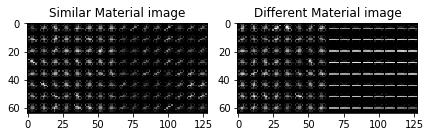

In [665]:
from skimage import filters, exposure, feature
# NOTE: block runs extremely slowly. 

# concatenating pairs so that the MLP takes in images as pairs
conc_training = []
conc_testing = []

y_train = []
y_test = []

print("Concatenating...")
for pair in training_pairs:
    image1 = io.imread(pair[0])
    image2 = io.imread(pair[1])
    
    # applying edge detection filter
    x, image1 = feature.hog(image1, visualize = True)
    x, image2 = feature.hog(image2, visualize = True)
    
    
    # concatenate into a 128x64 dimension photo
    concat_pair = np.concatenate((image1, image2), axis=1)
    conc_training.append(concat_pair)
    y_train.append(pair[2])
    
    # concatenate reverse order into a 128x64 dimension photo
    concat_pair = np.concatenate((image2, image1), axis=1)
    conc_training.append(concat_pair)
    y_train.append(pair[2])

print("Done with training pairs.\nConcatenating testing pairs...")
    
    
    
for pair in testing_pairs:
    image1 = io.imread(pair[0])
    image2 = io.imread(pair[1])
    
    # applying edge detection filter
    x, image1 = feature.hog(image1, visualize = True)
    x, image2 = feature.hog(image2, visualize = True)
   
    
    # concatenate into a 128x64 dimension photo
    concat_pair = np.concatenate((image1, image2), axis=1)
    conc_testing.append(concat_pair)
    y_test.append(pair[2])


print("Done")
    
# Graph the results to showcase the filter 

figure, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(conc_training[r1], cmap='gray')
ax[0].set_title("Similar Material image")

ax[1].imshow(conc_training[r4] , cmap='gray')
ax[1].set_title("Different Material image")

conc_training = np.asarray(conc_training)
conc_testing = np.asarray(conc_testing)


figure.tight_layout()

In [656]:
y_test = np.asarray(y_test)
y_train = np.asarray(y_train)
# perform naive undersampling due to the massive imbalance in our dataset
#index_dif = np.where(y_train == 1)[0]
#index_same = np.where(y_train == 0)[0]
#index_train = np.concatenate((index_same, index_dif))

#y_train2 = y_train[index_train]

X_train = np.asarray(conc_training)
#X_train = X_train[index_train]

X_test = np.asarray(conc_testing)

# Reshaping the training and testing sample into 2d shapes to be able to work on our model
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples, -1))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples, -1))


# creating and training our MLP model
nn_clf = MLPClassifier(max_iter=100, solver='adam',verbose='true', learning_rate = 'adaptive', hidden_layer_sizes = (100,100,50))
nn_clf.fit(X_train, y_train)

Iteration 1, loss = 0.11786403
Iteration 2, loss = 0.06028275
Iteration 3, loss = 0.04254197
Iteration 4, loss = 0.03091260
Iteration 5, loss = 0.02831274
Iteration 6, loss = 0.01666296
Iteration 7, loss = 0.01966663
Iteration 8, loss = 0.01215384
Iteration 9, loss = 0.02230709
Iteration 10, loss = 0.00977655
Iteration 11, loss = 0.00889613
Iteration 12, loss = 0.00928875
Iteration 13, loss = 0.00782672
Iteration 14, loss = 0.01475054
Iteration 15, loss = 0.00513059
Iteration 16, loss = 0.00698412
Iteration 17, loss = 0.00833610
Iteration 18, loss = 0.00098918
Iteration 19, loss = 0.00025294
Iteration 20, loss = 0.01432455
Iteration 21, loss = 0.00667097
Iteration 22, loss = 0.00091524
Iteration 23, loss = 0.00436187
Iteration 24, loss = 0.00831600
Iteration 25, loss = 0.00057495
Iteration 26, loss = 0.00620431
Iteration 27, loss = 0.00028899
Iteration 28, loss = 0.00021783
Iteration 29, loss = 0.00019643
Iteration 30, loss = 0.00018778
Training loss did not improve more than tol=0.000

MLPClassifier(hidden_layer_sizes=(100, 100, 50), learning_rate='adaptive',
              max_iter=100, verbose='true')

In [658]:
y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

print('Classifier scores on test set: ')
print_classifier_scores(y_test,y_pred_test)

Classifier accuracy on the test set is 0.9062097812097812 
Classifier scores on test set: 
Precision is 0.6165004533091568 
Recall is 0.8095238095238095 
F1 is 0.9444179616741348 
And the confusion matrix: 
 [[ 680  160]
 [ 423 4953]]


In [666]:
y_test = np.asarray(y_test)
y_train = np.asarray(y_train)
# perform naive undersampling due to the massive imbalance in our dataset
index_dif = np.where(y_train == 1)[0][:5040]
index_same = np.where(y_train == 0)[0]
index_train = np.concatenate((index_same, index_dif))

y_train2 = y_train[index_train]

X_train = np.asarray(conc_training)
X_train = X_train[index_train]

X_test = np.asarray(conc_testing)

# Reshaping the training and testing sample into 2d shapes to be able to work on our model
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples, -1))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples, -1))


# creating and training our MLP model
nn_clf = MLPClassifier(max_iter=100, solver='adam',verbose='true', learning_rate = 'adaptive', hidden_layer_sizes = (100,100,50))
nn_clf.fit(X_train, y_train2)

Iteration 1, loss = 0.54423278
Iteration 2, loss = 0.08071745
Iteration 3, loss = 0.03349301
Iteration 4, loss = 0.01557387
Iteration 5, loss = 0.00758327
Iteration 6, loss = 0.00486854
Iteration 7, loss = 0.00270050
Iteration 8, loss = 0.00194687
Iteration 9, loss = 0.00148310
Iteration 10, loss = 0.00111135
Iteration 11, loss = 0.00090852
Iteration 12, loss = 0.00075022
Iteration 13, loss = 0.00064299
Iteration 14, loss = 0.00051002
Iteration 15, loss = 0.00044857
Iteration 16, loss = 0.00039630
Iteration 17, loss = 0.00035430
Iteration 18, loss = 0.00031270
Iteration 19, loss = 0.00028146
Iteration 20, loss = 0.00026084
Iteration 21, loss = 0.00023285
Iteration 22, loss = 0.00021487
Iteration 23, loss = 0.00020059
Iteration 24, loss = 0.00018887
Iteration 25, loss = 0.00017528
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(100, 100, 50), learning_rate='adaptive',
              max_iter=100, verbose='true')

In [667]:
y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

print('Classifier scores on test set: ')
print_classifier_scores(y_test,y_pred_test)

Classifier accuracy on the test set is 0.7319819819819819 
Classifier scores on test set: 
Precision is 0.33506389776357826 
Recall is 0.9988095238095238 
F1 is 0.816681338028169 
And the confusion matrix: 
 [[ 839    1]
 [1665 3711]]


## Discussion

After applying HOG feature extraction to the images, our MLP Model's accuracy went up for both undersampled, and non-undersampled versions(0.16 => 0.73, 0.86 => 0.90 respectively)

Not only is our model predicting both classes, but our true positives and true negatives are also the highest quantities in the confusion matrix, which makes our 90% accuracy more meaningful than the last model's 86% where it only predicted "false".

Furthermore, we can see that the non-undersampled model has lower Recall than the undersampled model (0.99 vs 0.80), this can be explained by the severe imbalance in the dataset. In addition we can see that the undersampled model is worse than the non-undersampled model at predicting true negatives, this could be because we performed naive undersampling, and the samples that were chosen did not generalize well over the test set. Therefore proper undersampling with a sample that generalizes well could be used to improve the undersampled model even more, or we could perform oversampling for the minority class to improve our model.

Therefore, as far as feature extraction goes, I believe that using HOG has met my expectations, as shown by the increase in precision, recall, and accuracy in all models.

Ahmed Haj Abdel Khaleq

8223727